Logistic Regression Example from: https://realpython.com/logistic-regression-python/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# generate data
x = np.arange(10).reshape(-1, 1)
y = np.array([0,1,0,0,1,1,1,1,1,1])

You should carefully match the solver and regularization method for several reasons:

- 'liblinear' solver doesn’t work without regularization.
- 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
- 'saga' is the only solver that supports elastic-net regularization.

In [3]:
# fit model
model = LogisticRegression(
    solver='liblinear', 
    random_state=0,
    C=10.0
)
model.fit(x, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [4]:
# get results
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# print results
print(f"model coef: {model.coef_} intercept: {model.intercept_}")
print(f"p_pred: \n {p_pred}")
print(f"y_pred: \n {y_pred}")
print(f"score_: {score_}")
print(f"confusion_matrix: \n {conf_m}")
print(f"report: \n {report}")

model coef: [[0.703457]] intercept: [-1.51632619]
p_pred: 
 [[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]
y_pred: 
 [0 0 0 1 1 1 1 1 1 1]
score_: 0.8
confusion_matrix: 
 [[2 1]
 [1 6]]
report: 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

   micro avg       0.80      0.80      0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



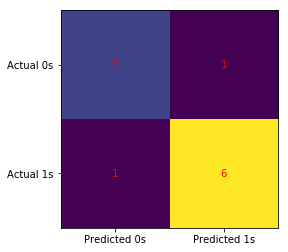

In [5]:
# heatmap for confusion matrix
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha='center', va='center', color='red')
plt.show()